In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import pearsonr
from scipy import stats
import warnings
from scipy.signal import argrelextrema
from cydets.algorithm import detect_cycles
import os 
import openpyxl

warnings.filterwarnings('ignore')

## Load Data

In [15]:
# feature
curr_path = os.getcwd()
filename_list = ['GDP.xlsx', 'IPMAN.xlsx', '10YearTreasury.xlsx', 'AMTMNO.xlsx', 'CPIFABSL.xlsx', 'MedianUsualWeeklyRealEarnings.xlsx',
                'PCE.xlsx', 'PPIACO.xlsx', 'TTLCONS.xlsx', 'VolumeOfTotalRetailTradeSales.xlsx', 'median_new_housing_sales.xlsx', 'unemployment.xlsx']
df_list = []
for i, file in enumerate(filename_list):
    input_path = os.path.join(curr_path,file)
    df = pd.read_excel(
        input_path,
        engine='openpyxl',
        #index_col=0
    )
    df.rename(columns={'observation_date':'Date'}, inplace=True)
    df_list.append(df)


In [11]:
# target variable
input_path = os.path.join(curr_path,'S&P500-EPS.xlsx')
eps_df = pd.read_excel(
    input_path,
    engine='openpyxl',
    header=None,
    skiprows = 1,
    #index_col=0
)
eps_df.columns = ['Date', 'SP500-PE', 'SP500-Price', 'SP500-EPS', 'SP500-Index']
eps_df.dropna(axis=0, how='any', inplace=True)

eps_df = eps_df.iloc[::-1]
eps_df['EPS-GR'] = eps_df['SP500-EPS'].pct_change(1) * 100

In [26]:
# left join features on the target table
t = eps_df
for df in df_list:
    t = pd.merge(t, df, on = 'Date', how="left")
t.to_csv('merged_data')
t = t.drop(['SP500-PE', 'SP500-Price', 'SP500-EPS'],1)


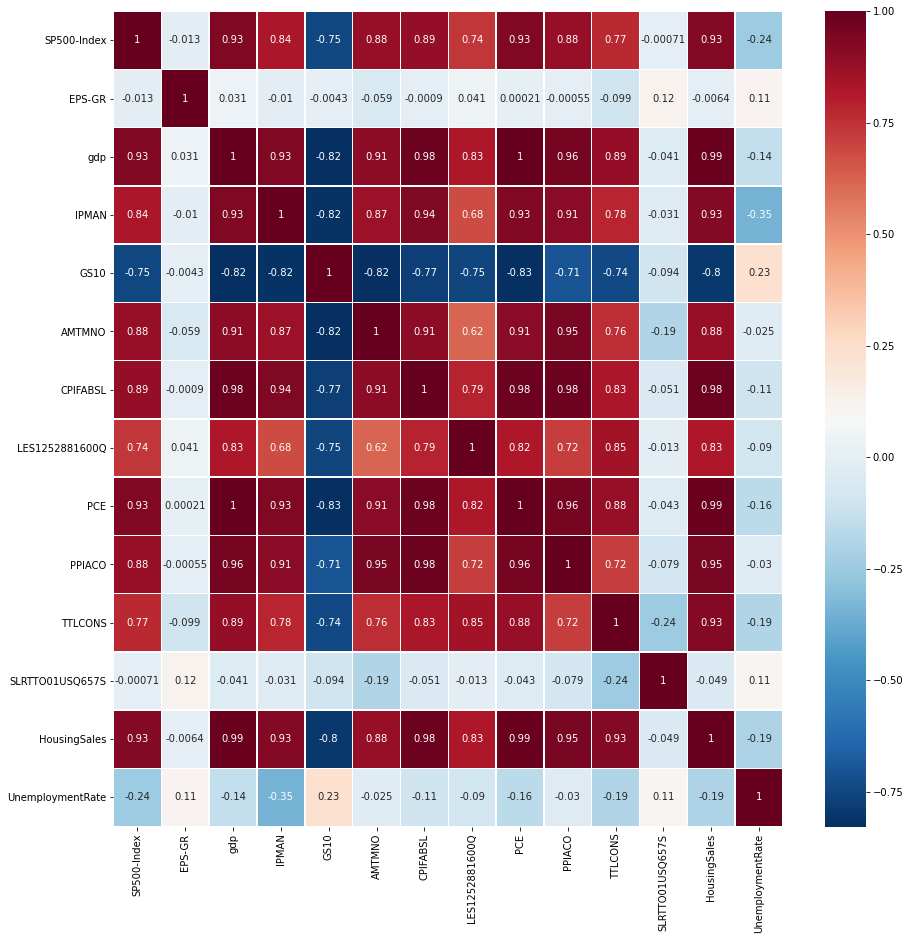

In [24]:
# correlation
plt.figure(figsize = (15,15))
pearsoncorr = t.corr(method='pearson')
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
cmap='RdBu_r',
annot=True,
linewidth=0.5)
plt.show()

In [ ]:
# power calculation
